In [1]:
#Stock Market (S&P 500) Sigma (standard deviation) Analysis
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1662999334128.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,09/09/2022,4067.36,--,4022.94,4076.81,4022.94
1,09/08/2022,4006.18,--,3959.94,4010.50,3944.81
2,09/07/2022,3979.87,--,3909.43,3987.89,3906.03
3,09/06/2022,3908.19,--,3930.89,3942.55,3886.75
4,09/02/2022,3924.26,--,3994.66,4018.43,3906.21
...,...,...,...,...,...,...
2541,09/18/2012,1459.32,--,1457.87,1461.47,1456.13
2542,09/17/2012,1461.19,--,1465.42,1465.63,1457.55
2543,09/14/2012,1465.77,--,1460.07,1474.51,1460.07
2544,09/13/2012,1459.99,--,1436.56,1463.76,1435.34


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2546.000000,2546.000000,2546.000000,2546.000000
mean,2658.825860,2636.355597,2650.153995,2621.351167
std,878.272031,920.671400,926.860041,913.751645
min,1353.330000,0.000000,0.000000,0.000000
25%,2002.190000,1997.345000,2009.092500,1988.200000
50%,2463.020000,2462.450000,2469.270000,2445.255000
75%,3093.830000,3090.382500,3111.160000,3076.000000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2515.000000,2515.000000,2515.000000,2515.000000
mean,2669.279765,2668.851431,2682.819909,2653.662056
std,878.137469,878.252200,884.302579,871.470830
min,1353.330000,1353.360000,1360.620000,1343.350000
25%,2012.515000,2013.550000,2022.140000,1998.365000
50%,2473.830000,2474.420000,2480.380000,2463.850000
75%,3112.555000,3108.205000,3120.690000,3090.910000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2545
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2515 non-null   object 
 1   Close/Last  2515 non-null   float64
 2   Volume      2515 non-null   object 
 3   Open        2515 non-null   float64
 4   High        2515 non-null   float64
 5   Low         2515 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.5+ KB


In [5]:
df.shape

(2515, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

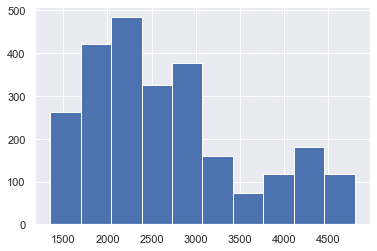

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

4067.36

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2669.279765407564

In [10]:
close_sd = df['Close/Last'].std()
close_sd

878.1374687485048

In [11]:
sigma1 = close_mean + close_sd
sigma1

3547.417234156069

In [12]:
sigma2 = close_mean + (2 * close_sd)
sigma2

4425.554702904574

In [13]:
sigma3 = close_mean + (3 * close_sd)
sigma3

5303.692171653078

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2545
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2515 non-null   datetime64[ns]
 1   Close/Last  2515 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 58.9 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2012-09-12 to 2022-09-09')

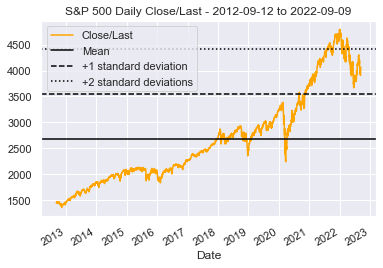

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2012-09-12 to 2022-09-09')

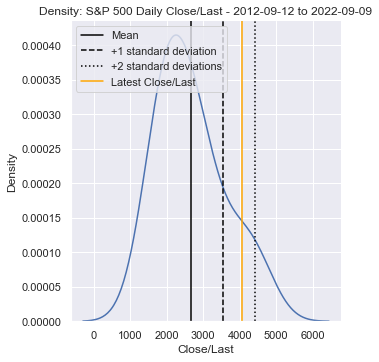

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.5920972334604264